<a href="https://colab.research.google.com/github/Soledad1988/Data-Analysis/blob/master/Analisis_Delitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importemos algunas de las librerías más clásicas para el manejo de datos en Python

#Pandas es la librería básica para la manipulación y análisis de datos
import pandas as pd

#Numpy es la biblioteca para crear vectores y matrices, además de un conjunto grande de funciones matemáticas
import numpy as np

#Seaborn es una librería que usamos para graficar
import seaborn as sns

#Statsmodels es la biblioteca para realizar modelos
import statsmodels.formula.api as smf

#1. Carga y visualización inicial del dataset


In [5]:
# Carga el dataset archivo CSV en este caso)
delitos = pd.read_csv('/content/drive/MyDrive/Datasets/delitos_2021.csv')

In [6]:
# Muestra las primeras filas para ver una vista general
delitos.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,110639,2021,OCTUBRE,MIERCOLES,2021-10-06,0.0,Hurto,Hurto total,NO,NO,VELEZ SARSFIELD,10.0,-34.631129,-58.489377,1
1,110640,2021,OCTUBRE,JUEVES,2021-10-07,23.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.624628,-58.501039,1
2,110641,2021,OCTUBRE,MIERCOLES,2021-10-06,12.0,Robo,Robo total,SI,NO,MONTE CASTRO,10.0,-34.623213,-58.510132,1
3,110642,2021,OCTUBRE,JUEVES,2021-10-07,20.0,Robo,Robo total,NO,NO,VELEZ SARSFIELD,10.0,-34.627172,-58.498928,1
4,110643,2021,OCTUBRE,SABADO,2021-10-09,11.0,Hurto,Hurto total,NO,NO,FLORESTA,10.0,-34.626978,-58.483313,1


In [7]:
# Información general sobre las columnas y tipos de datos
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111962 entries, 0 to 111961
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id-mapa   111962 non-null  int64  
 1   anio      111962 non-null  int64  
 2   mes       111962 non-null  object 
 3   dia       111962 non-null  object 
 4   fecha     111962 non-null  object 
 5   franja    110222 non-null  float64
 6   tipo      111962 non-null  object 
 7   subtipo   111962 non-null  object 
 8   uso_arma  111962 non-null  object 
 9   uso_moto  111962 non-null  object 
 10  barrio    109378 non-null  object 
 11  comuna    109378 non-null  float64
 12  latitud   109383 non-null  float64
 13  longitud  109383 non-null  float64
 14  cantidad  111962 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 12.8+ MB


In [9]:
# Resumen estadístico para las columnas numéricas
delitos.describe()

,id-mapa,anio,franja,comuna,latitud,longitud,cantidad
count,1.119620e+05,111962.0,110222.000000,109378.000000,109383.000000,109383.000000,111962.0
mean,3.668101e+05,2021.0,13.065849,7.441085,-34.614393,-58.437135,1.0
std,3.535329e+05,0.0,6.265939,4.496635,0.033210,0.058557,0.0
min,1.106390e+05,2021.0,0.000000,1.000000,-34.707500,-70.607629,1.0
25%,1.386292e+05,2021.0,9.000000,4.000000,-34.635829,-58.469734,1.0
50%,1.666195e+05,2021.0,14.000000,7.000000,-34.614580,-58.435283,1.0
75%,8.617812e+05,2021.0,18.000000,12.000000,-34.592547,-58.402338,1.0
max,1.114387e+06,2021.0,23.000000,15.000000,-31.420083,-58.342665,1.0


#2. Limpieza de datos

In [10]:
# Verificar valores nulos
delitos.isnull().sum()

,0
id-mapa,0
anio,0
mes,0
dia,0
fecha,0
franja,1740
tipo,0
subtipo,0
uso_arma,0
uso_moto,0


In [12]:
# Verificar si hay filas duplicadas
# Opcional: eliminar duplicados si es necesario
#df = df.drop_duplicates()
delitos.duplicated().sum()

0

#3. Análisis exploratorio de datos (EDA)


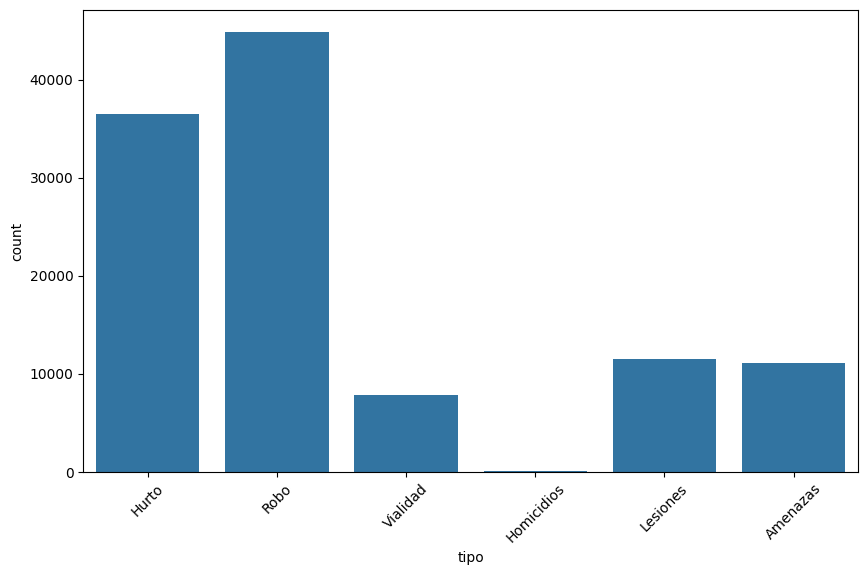

In [15]:
# a - Distribución de variables categóricas
#Ve la distribución de algunas columnas categóricas como tipo, subtipo, uso_arma, barrio, etc
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución del tipo de delito
plt.figure(figsize=(10,6))
sns.countplot(x='tipo', data=delitos)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


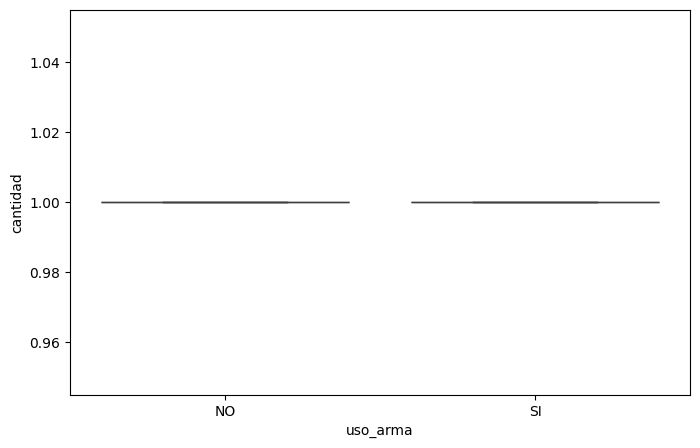

In [17]:
# b) Relación entre variables
# Analiza la relación entre variables numéricas como cantidad y otras categóricas, por ejemplo, el uso de arma o moto.
# Boxplot de cantidad según el uso de armas
plt.figure(figsize=(8,5))
sns.boxplot(x='uso_arma', y='cantidad', data=delitos)
plt.show()

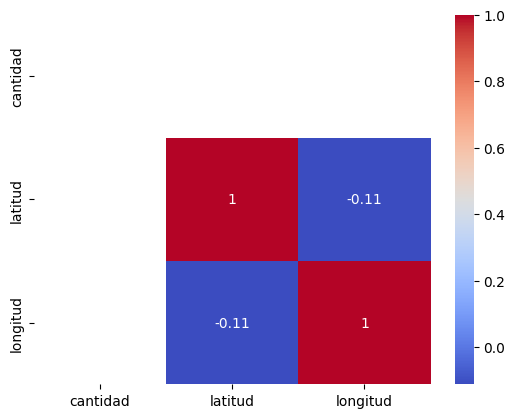

In [19]:
# c) Correlación entre variables numéricas
# Si deseas ver la correlación entre columnas como cantidad, latitud y longitud:
# Matriz de correlación
corr_matrix = delitos[['cantidad', 'latitud', 'longitud']].corr()

# Mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#4. Modelos y análisis estadístico

In [23]:
import statsmodels.api as sm

# Convertir la columna 'uso_arma' de booleano a 0 y 1
delitos['uso_arma'] = delitos['uso_arma'].astype(int)

# Revisar si la conversión fue correcta
print(delitos[['uso_arma']].head())

# Por ejemplo, una regresión lineal simple para ver el efecto del uso de arma sobre la cantidad
X = delitos[['uso_arma']]  # Variable independiente numérica ahora
y = delitos['cantidad']  # Variable dependiente

# Añadir constante para la regresión
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Ver resultados
print(model.summary())

   uso_arma
0         0
1         0
2         1
3         0
4         0
                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -1.120e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               1.00
Time:                        20:39:57   Log-Likelihood:             3.4688e+06
No. Observations:              111962   AIC:                        -6.938e+06
Df Residuals:                  111960   BIC:                        -6.938e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


#5. Preguntas clave que puedes hacer
¿Cuáles son los barrios con mayor cantidad de incidentes?
¿Cómo varía el tipo de delito con el uso de armas o motos?
¿Existen patrones temporales, como picos en ciertos meses, días o franjas horarias?

In [25]:
#¿Cuáles son los barrios con mayor cantidad de incidentes?
#Agrupar por barrio y sumar la cantidad de incidentes
# Agrupar por barrio y sumar la columna 'cantidad'
incidentes_por_barrio = delitos.groupby('barrio')['cantidad'].sum().reset_index()

# Ordenar de mayor a menor cantidad de incidentes
incidentes_por_barrio = incidentes_por_barrio.sort_values(by='cantidad', ascending=False)

# Mostrar los barrios con mayor cantidad de incidentes
print(incidentes_por_barrio.head(10))  # Mostrar los 10 barrios con más incidentes

          barrio  cantidad
20       PALERMO      8881
2      BALVANERA      7213
12        FLORES      6136
27      RECOLETA      5161
39  VILLA LUGANO      4904
7      CABALLITO      4891
1        ALMAGRO      4226
3       BARRACAS      4051
11  CONSTITUCION      3652
4       BELGRANO      3514


<ipython-input-26-54c6e31d609a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='barrio', y='cantidad', data=incidentes_por_barrio.head(10), palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

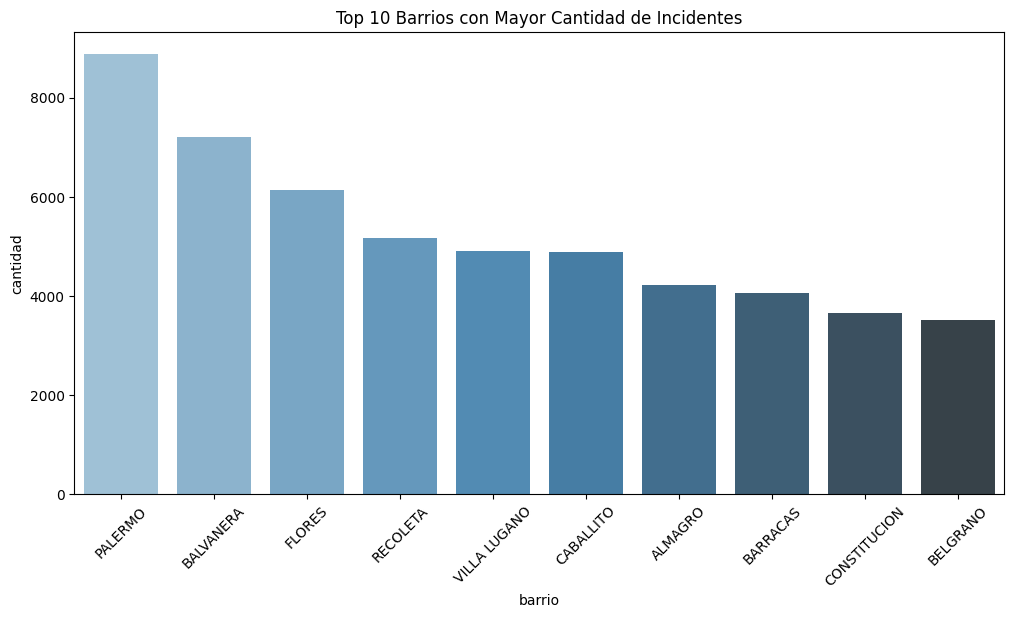

In [26]:
 #Visualización (opcional)

# Gráfico de barras con los 10 barrios con mayor cantidad de incidentes
plt.figure(figsize=(12,6))
sns.barplot(x='barrio', y='cantidad', data=incidentes_por_barrio.head(10), palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Top 10 Barrios con Mayor Cantidad de Incidentes')
plt.show()

In [28]:
#¿Cómo varía el tipo de delito con el uso de armas o motos?
# Agrupar por tipo de delito, uso de armas y uso de motos
delitos_agrupados = delitos.groupby(['tipo', 'uso_arma', 'uso_moto'])['cantidad'].sum().reset_index()

# Mostrar los resultados
print(delitos_agrupados.head(10))  # Mostrar las primeras 10 combinaciones


         tipo  uso_arma uso_moto  cantidad
0    Amenazas         0       NO     11073
1  Homicidios         0       NO       103
2       Hurto         0       NO     36549
3    Lesiones         0       NO     11517
4        Robo         0       NO     33074
5        Robo         0       SI      3345
6        Robo         1       NO      7199
7        Robo         1       SI      1279
8    Vialidad         0       NO      7823


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


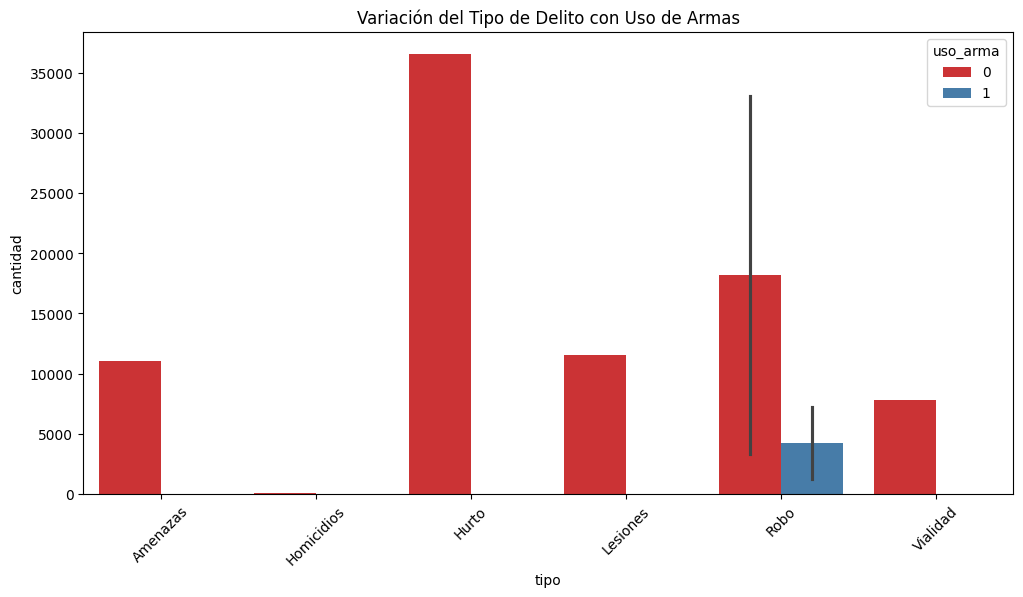

In [29]:
#Visualización de la variación de delitos con armas
# Gráfico de barras para el uso de armas
plt.figure(figsize=(12,6))
sns.barplot(x='tipo', y='cantidad', hue='uso_arma', data=delitos_agrupados, palette='Set1')
plt.title('Variación del Tipo de Delito con Uso de Armas')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


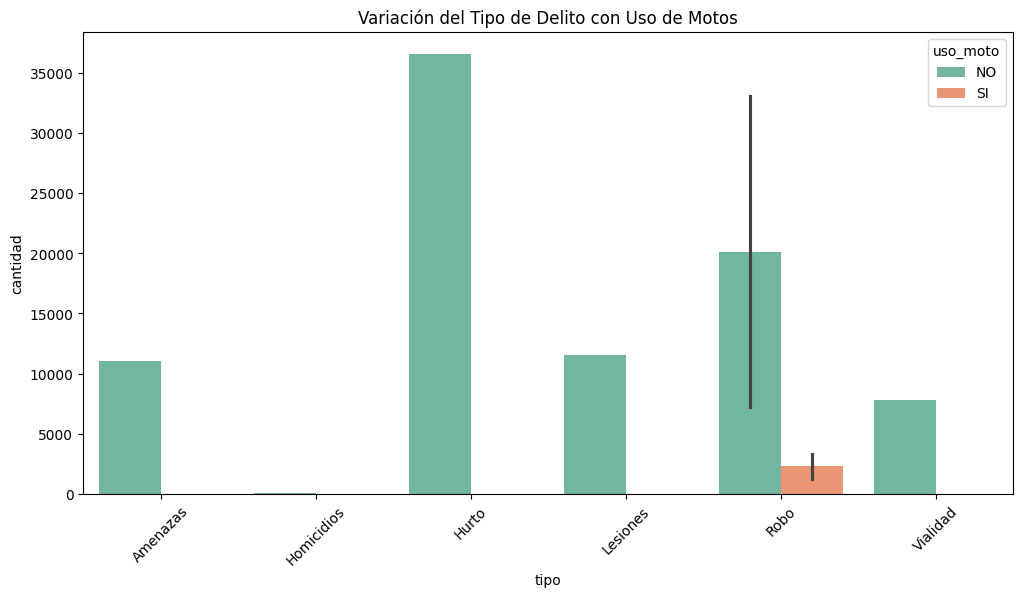

In [30]:
#Visualización de la variación de delitos con motos
# Gráfico de barras para el uso de motos
plt.figure(figsize=(12,6))
sns.barplot(x='tipo', y='cantidad', hue='uso_moto', data=delitos_agrupados, palette='Set2')
plt.title('Variación del Tipo de Delito con Uso de Motos')
plt.xticks(rotation=45)
plt.show()


<ipython-input-33-465ee05ebeef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='cantidad', data=delitos_por_mes, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

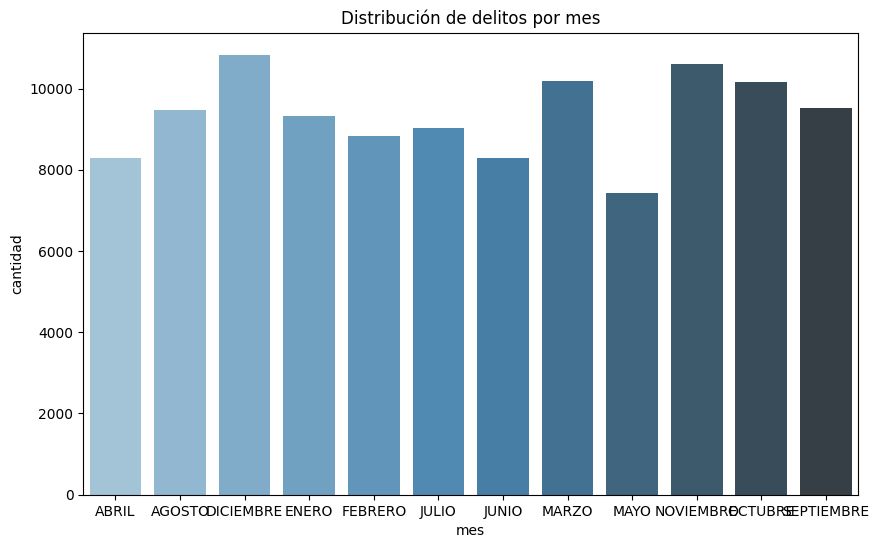

In [33]:
#¿Existen patrones temporales, como picos en ciertos meses, días o franjas horarias?
# Distribución de delitos por mes
#Primero, agrupa los datos por la columna mes para ver la cantidad de delitos en cada mes:
# Agrupar por mes y sumar la cantidad de delitos
delitos_por_mes = delitos.groupby('mes')['cantidad'].sum().reset_index()

# Visualización
#Este gráfico te mostrará si hay algún mes en particular con picos de delitos.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='mes', y='cantidad', data=delitos_por_mes, palette='Blues_d')
plt.title('Distribución de delitos por mes')
plt.show()


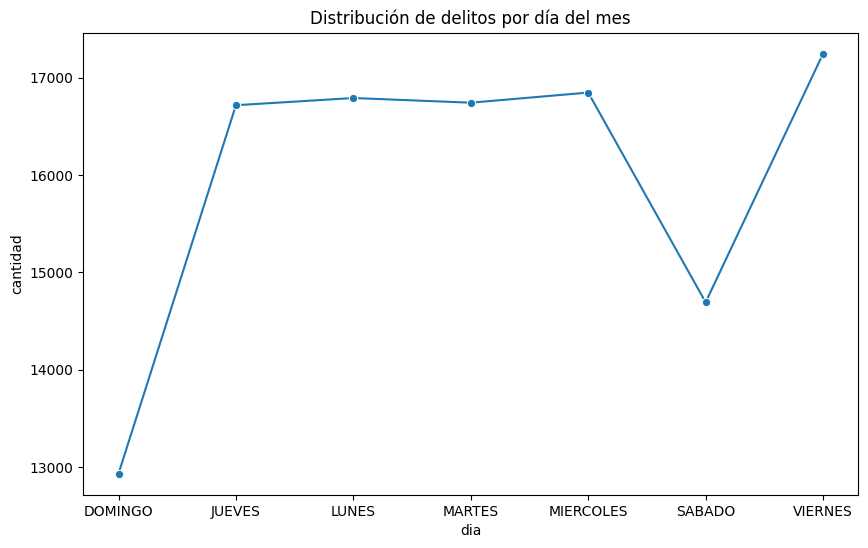

In [34]:
#Distribución de delitos por día
#Puedes hacer lo mismo para ver cómo varía la cantidad de delitos según el día del mes:
# Agrupar por día y sumar la cantidad de delitos
delitos_por_dia = delitos.groupby('dia')['cantidad'].sum().reset_index()

# Visualización
plt.figure(figsize=(10,6))
sns.lineplot(x='dia', y='cantidad', data=delitos_por_dia, marker='o')
plt.title('Distribución de delitos por día del mes')
plt.show()


<ipython-input-35-28e6490df6ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='franja', y='cantidad', data=delitos_por_franja, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

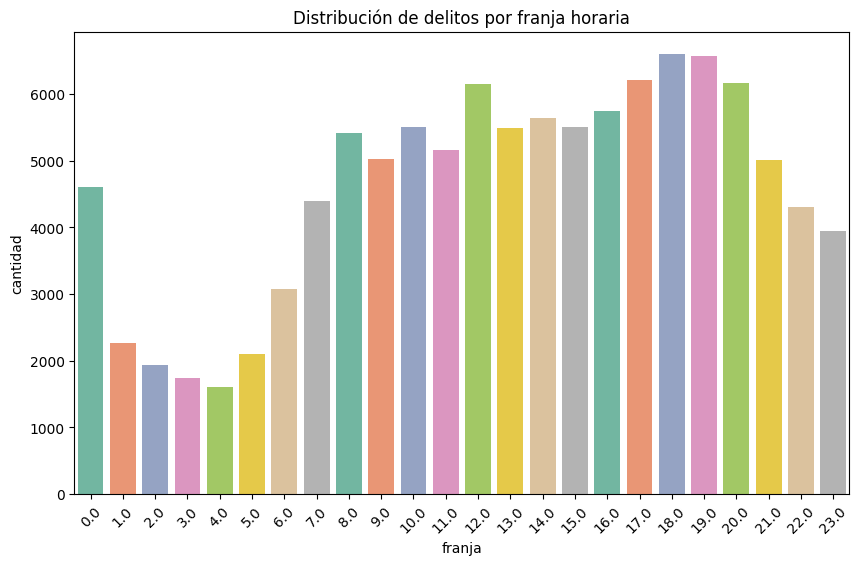

In [35]:
#Distribución de delitos por franja horaria
#La columna franja probablemente representa intervalos de tiempo durante el día (por ejemplo, "mañana", "tarde", "noche").
#Para analizar la distribución de delitos en las diferentes franjas horarias:
# Agrupar por franja horaria y sumar la cantidad de delitos
delitos_por_franja = delitos.groupby('franja')['cantidad'].sum().reset_index()

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='franja', y='cantidad', data=delitos_por_franja, palette='Set2')
plt.title('Distribución de delitos por franja horaria')
plt.xticks(rotation=45)
plt.show()


<ipython-input-36-9060d4a771d7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia_semana', y='cantidad', data=delitos_por_dia_semana, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

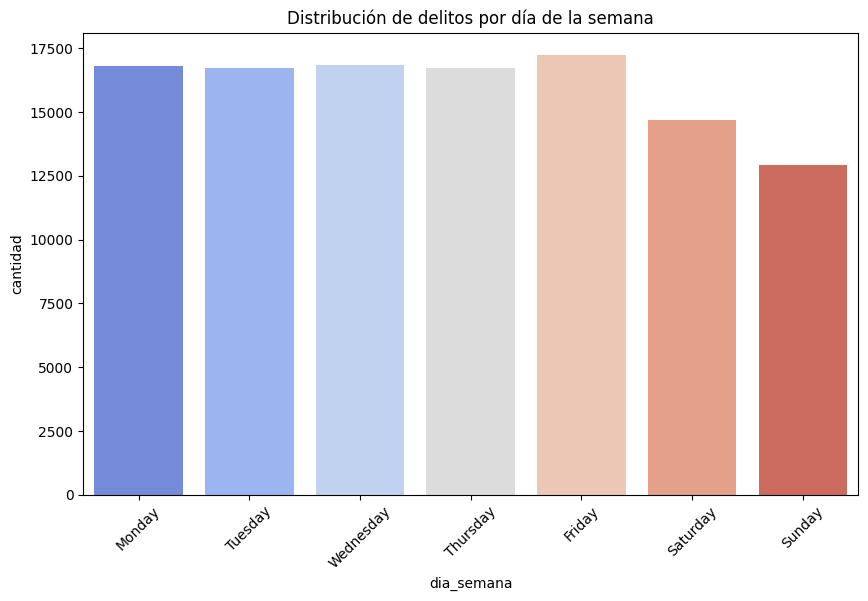

In [36]:
#Distribución de delitos por día de la semana (si aplicable)
#Si tienes una columna que representa el día de la semana, también podrías analizar patrones en función del día (por ejemplo, ver si hay más delitos los fines de semana).
#Si no la tienes, podrías crear una columna nueva derivada de la fecha:
# Crear una columna nueva que contenga el día de la semana (si tienes la columna 'fecha')
delitos['fecha'] = pd.to_datetime(delitos['fecha'])
delitos['dia_semana'] = delitos['fecha'].dt.day_name()

# Agrupar por día de la semana
delitos_por_dia_semana = delitos.groupby('dia_semana')['cantidad'].sum().reset_index()

# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delitos_por_dia_semana['dia_semana'] = pd.Categorical(delitos_por_dia_semana['dia_semana'], categories=dias_ordenados, ordered=True)
delitos_por_dia_semana = delitos_por_dia_semana.sort_values('dia_semana')

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x='dia_semana', y='cantidad', data=delitos_por_dia_semana, palette='coolwarm')
plt.title('Distribución de delitos por día de la semana')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Conclusiones:
#Picos por mes: El gráfico de distribución por mes te ayudará a identificar si hay más delitos en ciertos meses.
#Picos por día: El gráfico de distribución por día del mes puede mostrarte si ciertos días tienen más delitos.
#Patrones horarios: El análisis por franja horaria puede revelar en qué momentos del día ocurren más delitos.
#Día de la semana: Puedes analizar si los delitos tienden a concentrarse en días laborales o fines de semana.